## Importing Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sn
import datetime
%load_ext tensorboard
import plotly.express as px
import math
from scipy import stats
from sklearn.metrics import accuracy_score

In [2]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir= '/content/drive/My Drive/Thesis/version_2'

## Data exploration

In [4]:
df = pd.read_csv(os.path.join(data_dir,'labels.csv'))
label_count = {}

index=0
for i in df['Primary Diagnosis']:
    z= ','.join([i,df['Tissue'][index]])
    label_count[z] = label_count.get(z, 0) + 1
    index+=1
    
new_df = pd.DataFrame(list(label_count.items()), columns=['labels','count'])
new_df.sort_values(['count'], ascending = False, inplace =True)
print(new_df.head(n=10))


fig = px.bar(new_df[:10], x="labels", y='count',  color="count",
    orientation='v', 
    title='Frequency of the Labels in TCGA dataset', 
    color_continuous_scale=px.colors.sequential.Viridis_r
)
fig.update_layout(title_x=0.5, xaxis_title = 'Labels', yaxis_title = 'Label Count')
fig.update_xaxes(tickangle=60)
fig.show()

                                            labels  count
3          Acute myeloid leukemia, NOS,Bone marrow   1765
79    Infiltrating duct carcinoma, NOS,Breast, NOS    756
2       Clear cell adenocarcinoma, NOS,Kidney, NOS    502
31              Adenocarcinoma, NOS,Prostate gland    481
16            Serous cystadenocarcinoma, NOS,Ovary    481
195              Malignant melanoma, NOS,Skin, NOS    403
4      Papillary adenocarcinoma, NOS,Thyroid gland    355
11       Papillary adenocarcinoma, NOS,Kidney, NOS    291
144  Squamous cell carcinoma, NOS,Upper lobe, lung    235
77              Lobular carcinoma, NOS,Breast, NOS    198


## Data preperation

In [5]:
class Dataset(object):
  def __init__(self):
    self.data = []
    self.labels = []
  
 
  def load_data(self, labels,file_dir):
    limit = 300
    list_of_labels = self.load_labels()
    df = labels
    d = {}
    
    for ind in df.index:
      
      la = labels['Primary Diagnosis'][ind] + ' ' +labels['Tissue'][ind]
      label_count = d.get(la, 0)
      
      if la in list_of_labels and label_count <= limit :
        d[la] = d.get(la,0) + 1
        print(f'{la} added')
      else:
        continue
      data = pd.read_csv(os.path.join(file_dir, labels['File_name'][ind]), delimiter='\t')
      temp_data = np.array(data['reads_per_million_miRNA_mapped'])
      
      temp_data = (temp_data - np.mean(temp_data))/ (np.std(temp_data) + 1e-6)
      self.data.append(temp_data)
      self.labels.append(la)

    self.data=np.array(self.data) 
    self.labels = np.array(self.labels)

    shuffler = np.random.permutation(len(self.data))

    array1 = self.data[shuffler]
    array2 = self.labels[shuffler]
    
    array2 = self.labels_string_number(array2)
    return array1, array2
  
  def labels_string_number(self,y_train):
    array = np.array([self.convert_labels(y_train[i],value=True) for i in range(len(y_train))])
    return array

  
  def print_array(self,i):
    print(self.data[i:,])
    print(self.labels[i])
  
  def print_shape(self):
    print(self.data.shape)
    print(self.labels.shape)


  def load_labels(self):
    return ['Acute myeloid leukemia, NOS Bone marrow',
            'Infiltrating duct carcinoma, NOS Breast, NOS',
            'Clear cell adenocarcinoma, NOS Kidney, NOS' , 
            'Serous cystadenocarcinoma, NOS Ovary', 
            'Malignant melanoma, NOS Skin, NOS',
            'Papillary adenocarcinoma, NOS Thyroid gland',
            'Papillary adenocarcinoma, NOS Kidney, NOS',
            'Squamous cell carcinoma, NOS Upper lobe, lung']
  
  def convert_labels(self,k, value=True):
    d = {
        'Acute myeloid leukemia, NOS Bone marrow': 0,
        'Infiltrating duct carcinoma, NOS Breast, NOS' : 1,
        'Clear cell adenocarcinoma, NOS Kidney, NOS' : 2,
        'Serous cystadenocarcinoma, NOS Ovary' : 3,
        'Malignant melanoma, NOS Skin, NOS': 4,
          'Papillary adenocarcinoma, NOS Thyroid gland': 5,
         'Papillary adenocarcinoma, NOS Kidney, NOS': 6,
         'Squamous cell carcinoma, NOS Upper lobe, lung':7
        }
    if value == True:
      return d[k]
    else:
      for key,value in d.items():
        if k == value:
          return key    
      


In [6]:
data_set = Dataset()

In [7]:
data, labels=data_set.load_data(pd.read_csv(os.path.join(data_dir, 'labels.csv')),os.path.join(data_dir, 'preprocessed_data'))

Clear cell adenocarcinoma, NOS Kidney, NOS added
Clear cell adenocarcinoma, NOS Kidney, NOS added
Clear cell adenocarcinoma, NOS Kidney, NOS added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, NOS Bone marrow added
Acute myeloid leukemia, N

In [8]:

print(data.shape)

(2332, 1881)


In [9]:
print(labels)

[0 1 3 ... 0 2 1]


## Spliting the dataset


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42,stratify=labels)

#  Model Training

3 models for trainign. 
1. ANN Batch - 32,64,128
2. LSTM Batch - 32,64,128
3. CResNet Batch - 32, 64, 128

Models to train
- [X] Ensemble model
- [X] Model with skip connects

To do- 
- [X] Add tensorboard
- [X] Train the models 
- [X] Evaluate the results


In [11]:
def scheduler(epoch):
	initial_lr = 0.001
	drop = 0.5
	epochs_drop = 1
	lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lr

adaptive_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [12]:
!rm -rf logs

## ANN


In [13]:
# Sequential model
input = tf.keras.Input(shape=(X_train[1].shape), name='Input_layer')
dense_1 = tf.keras.layers.Dense(activation='relu', units = 1024)(input)
bn_1 = tf.keras.layers.BatchNormalization()(dense_1)
dense_2 = tf.keras.layers.Dense(512, activation='relu')(bn_1)
bn_2 = tf.keras.layers.BatchNormalization()(dense_2)
dense_3 = tf.keras.layers.Dense(256, activation='relu')(bn_2)
dropout_1 = tf.keras.layers.Dropout(0.2)(dense_3)
dense_4 = tf.keras.layers.Dense(64, activation='relu')(dropout_1)
output = tf.keras.layers.Dense(8, activation='softmax')(dense_4) 


### Initializing models for ann

In [14]:
model_ann_batch_16 = tf.keras.Model(inputs=input, outputs=output,name = 'Artificial_Neural_Network')
model_ann_batch_32 = tf.keras.Model(inputs=input, outputs=output,name = 'Artificial_Neural_Network')
model_ann_batch_64 = tf.keras.Model(inputs=input, outputs=output,name = 'Artificial_Neural_Network')

### Model compilation

In [15]:
model_ann_batch_16.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model_ann_batch_32.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model_ann_batch_64.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

saved_dir_ANN_16 = 'saved_model/ANN/batch_16/'
saved_dir_ANN_32 = 'saved_model/ANN/batch_32/'
saved_dir_ANN_64 = 'saved_model/ANN/batch_64/'

log_dir_ANN_16 = "logs/fit/ANN/batch_16/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_ANN_32 = "logs/fit/ANN/batch_32/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_ANN_64 = "logs/fit/ANN/batch_64/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_ANN = "logs/fit/ANN" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback_ANN_16 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_ANN_16, histogram_freq=1)
tensorboard_callback_ANN_32 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_ANN_32, histogram_freq=1)
tensorboard_callback_ANN_64 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_ANN_64, histogram_freq=1)



### Model training for ANN

In [16]:
with tf.device('/device:GPU:0'):
  model_ann_batch_16.fit(X_train, y_train, validation_split=0.1, epochs=200,verbose=1, callbacks=[tensorboard_callback_ANN_16, adaptive_lr],batch_size=16)
  model_ann_batch_32.fit(X_train, y_train, validation_split=0.1, epochs=200,verbose=1, callbacks=[tensorboard_callback_ANN_32, adaptive_lr],batch_size=32)
  model_ann_batch_64.fit(X_train, y_train, validation_split=0.1, epochs=200,verbose=1, callbacks=[tensorboard_callback_ANN_64, adaptive_lr],batch_size=64)

Epoch 1/200
99/99 [==============================] - 5s 14ms/step - loss: 0.8955 - accuracy: 0.7112 - val_loss: 0.3894 - val_accuracy: 0.8686
Epoch 2/200
99/99 [==============================] - 0s 4ms/step - loss: 0.2669 - accuracy: 0.9144 - val_loss: 0.2335 - val_accuracy: 0.9371
Epoch 3/200
99/99 [==============================] - 0s 4ms/step - loss: 0.1819 - accuracy: 0.9499 - val_loss: 0.1738 - val_accuracy: 0.9429
Epoch 4/200
99/99 [==============================] - 0s 4ms/step - loss: 0.1255 - accuracy: 0.9618 - val_loss: 0.1678 - val_accuracy: 0.9486
Epoch 5/200
99/99 [==============================] - 0s 4ms/step - loss: 0.1345 - accuracy: 0.9587 - val_loss: 0.1828 - val_accuracy: 0.9429
Epoch 6/200
99/99 [==============================] - 0s 4ms/step - loss: 0.1387 - accuracy: 0.9515 - val_loss: 0.1648 - val_accuracy: 0.9486
Epoch 7/200
99/99 [==============================] - 0s 4ms/step - loss: 0.1097 - accuracy: 0.9653 - val_loss: 0.1717 - val_accuracy: 0.9429
Epoch 8/200


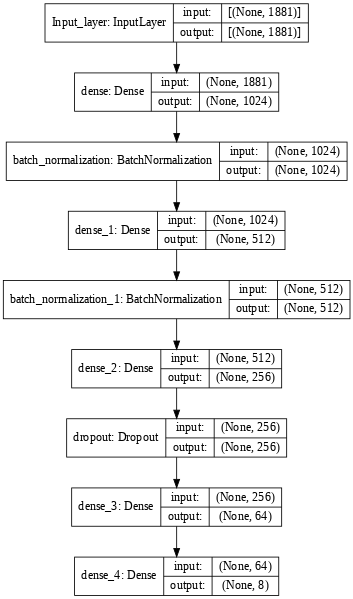

In [17]:
tf.keras.utils.plot_model(model_ann_batch_16, rankdir = 'TB', show_layer_names=True,dpi=60,show_shapes=True)

### Model testing for ANN

In [18]:
# Batch = 16
loss_ann, acc_ann =model_ann_batch_16.evaluate(X_test, y_test)
print(f'For ANN batch 16 Loss: {loss_ann:.4f}, Accuracy: {acc_ann:.4f}')

# Batch = 32
loss_ann, acc_ann =model_ann_batch_32.evaluate(X_test, y_test)
print(f'For ANN batch 32 Loss: {loss_ann:.4f}, Accuracy: {acc_ann:.4f}')


# Batch = 64
loss_ann, acc_ann =model_ann_batch_64.evaluate(X_test, y_test)
print(f'For ANN batch 64 Loss: {loss_ann:.4f}, Accuracy: {acc_ann:.4f}')

19/19 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9451
For ANN batch 16 Loss: 0.2105, Accuracy: 0.9451
19/19 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9451
For ANN batch 32 Loss: 0.2105, Accuracy: 0.9451
19/19 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9451
For ANN batch 64 Loss: 0.2105, Accuracy: 0.9451


# Utility function for calculating confusion matrix

In [19]:
def return_preds(model, X_test):
  pred = model.predict(X_test)
  #print(preds)
  z = [np.argmax(pred[i]) for i in range(pred.shape[0])]
  return z


In [20]:
def metrics_calculator(data):
  metrics = np.zeros(shape=(8,5))
  for cancer in range(0,8):
    tp = data[cancer,cancer]
    true_negative_data = np.delete(np.delete(data,cancer,axis=0),cancer,axis=1)
    tn = true_negative_data.sum()
    fp = np.delete(data,cancer,axis=0)[:,cancer].sum()
    fn = np.delete(data,cancer,axis=1)[cancer,:].sum()
    metrics[cancer, 0] = tp
    metrics[cancer, 1] = tn
    metrics[cancer, 2] = fp
    metrics[cancer, 3] = fn
    metrics[cancer, 4] = mcc(tp,tn,fp,fn)
  df = pd.DataFrame(metrics, 
                       index=['Acute myeloid leukemia, NOS Bone marrow',
            'Infiltrating duct carcinoma, NOS Breast, NOS',
            'Clear cell adenocarcinoma, NOS Kidney, NOS' , 
            'Serous cystadenocarcinoma, NOS Ovary', 
            'Malignant melanoma, NOS Skin, NOS',
            'Papillary adenocarcinoma, NOS Thyroid gland',
            'Papillary adenocarcinoma, NOS Kidney, NOS',
            'Squamous cell carcinoma, NOS,Upper lobe, lung'],
            columns = [
                       'True positive',
                       "True negative",
                       "False positive",
                       "False negative",
                       "MCC"
            ] 
                       )
  print(metrics)
  print(f'Average MCC value:{np.average(metrics[:,4])}')


In [21]:
def mcc(tp,tn,fp,fn):
  denominator = (tp + fp)*(tp+fn)*(tn+fp)*(tn+fn)
  mcc = (tp*tn - fp*fn)/np.sqrt(denominator)
  return mcc 

In [22]:
def show_confusion_matrix(y_test, z):
  data = confusion_matrix(y_test,z)
  metrics_calculator(data)
  df_cm = pd.DataFrame(data, columns=['Acute myeloid leukemia, NOS Bone marrow',
            'Infiltrating duct carcinoma, NOS Breast, NOS',
            'Clear cell adenocarcinoma, NOS Kidney, NOS' , 
            'Serous cystadenocarcinoma, NOS Ovary', 
            'Malignant melanoma, NOS Skin, NOS',
            'Papillary adenocarcinoma, NOS Thyroid gland',
            'Papillary adenocarcinoma, NOS Kidney, NOS',
            'Squamous cell carcinoma, NOS,Upper lobe, lung'], 
            index = ['Acute myeloid leukemia, NOS Bone marrow',
            'Infiltrating duct carcinoma, NOS Breast, NOS',
            'Clear cell adenocarcinoma, NOS Kidney, NOS' , 
            'Serous cystadenocarcinoma, NOS Ovary', 
            'Malignant melanoma, NOS Skin, NOS',
            'Papillary adenocarcinoma, NOS Thyroid gland',
            'Papillary adenocarcinoma, NOS Kidney, NOS',
            'Squamous cell carcinoma, NOS,Upper lobe, lung'])
  df_cm.index.name = 'True label'
  df_cm.columns.name = 'Predicted label'
  plt.figure(figsize = (10,7))
  sn.set(font_scale=1.4)
  sn.heatmap(df_cm, cmap="Pastel2", annot=True,annot_kws={"size": 16})

### Confusion matrix(ANN)

[[ 74.         507.           1.           1.           0.98469816]
 [ 69.         499.           9.           6.           0.88738584]
 [ 71.         499.           9.           4.           0.90391148]
 [ 75.         505.           2.           1.           0.97745846]
 [ 71.         506.           2.           4.           0.95368102]
 [ 74.         506.           2.           1.           0.97720521]
 [ 64.         507.           3.           9.           0.90368617]
 [ 53.         520.           4.           6.           0.90443821]]
Average MCC value:0.9365580709854


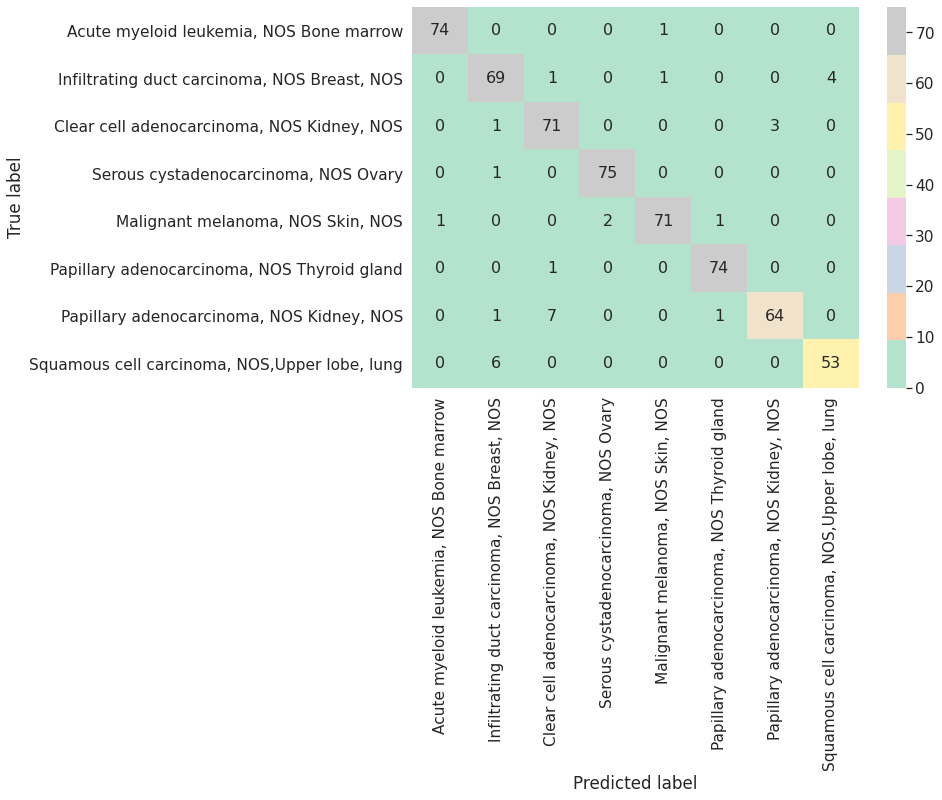

In [23]:
preds = return_preds(model_ann_batch_16, X_test)
show_confusion_matrix(y_test, preds)

[[ 74.         507.           1.           1.           0.98469816]
 [ 69.         499.           9.           6.           0.88738584]
 [ 71.         499.           9.           4.           0.90391148]
 [ 75.         505.           2.           1.           0.97745846]
 [ 71.         506.           2.           4.           0.95368102]
 [ 74.         506.           2.           1.           0.97720521]
 [ 64.         507.           3.           9.           0.90368617]
 [ 53.         520.           4.           6.           0.90443821]]
Average MCC value:0.9365580709854


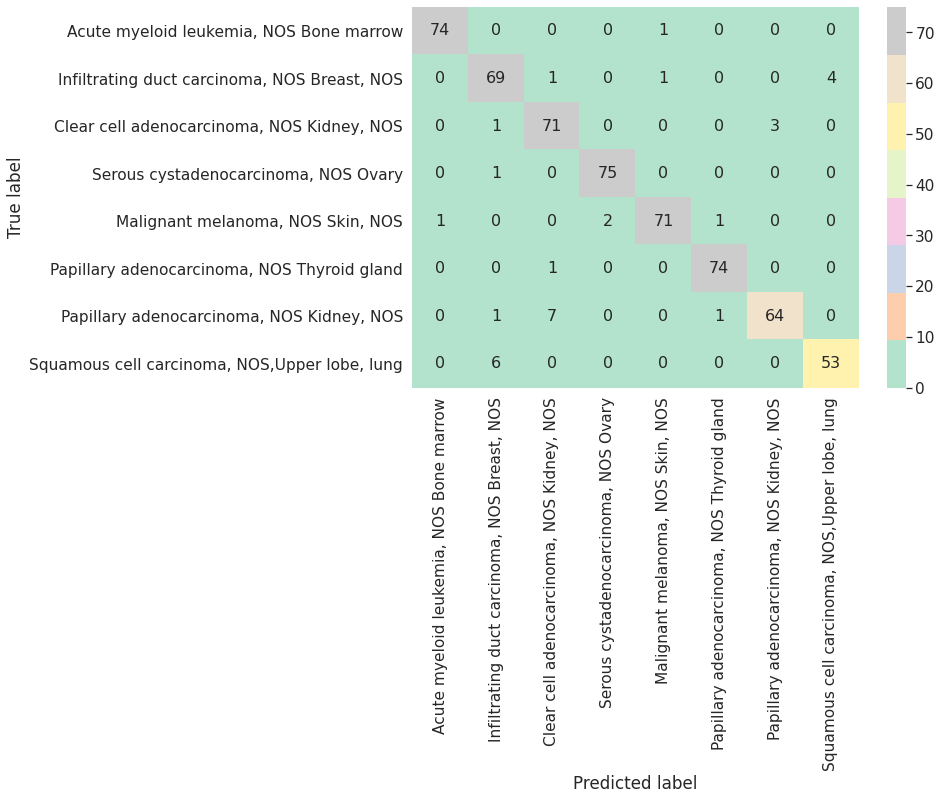

In [24]:
preds = return_preds(model_ann_batch_32, X_test)
show_confusion_matrix(y_test, preds)

[[ 74.         507.           1.           1.           0.98469816]
 [ 69.         499.           9.           6.           0.88738584]
 [ 71.         499.           9.           4.           0.90391148]
 [ 75.         505.           2.           1.           0.97745846]
 [ 71.         506.           2.           4.           0.95368102]
 [ 74.         506.           2.           1.           0.97720521]
 [ 64.         507.           3.           9.           0.90368617]
 [ 53.         520.           4.           6.           0.90443821]]
Average MCC value:0.9365580709854


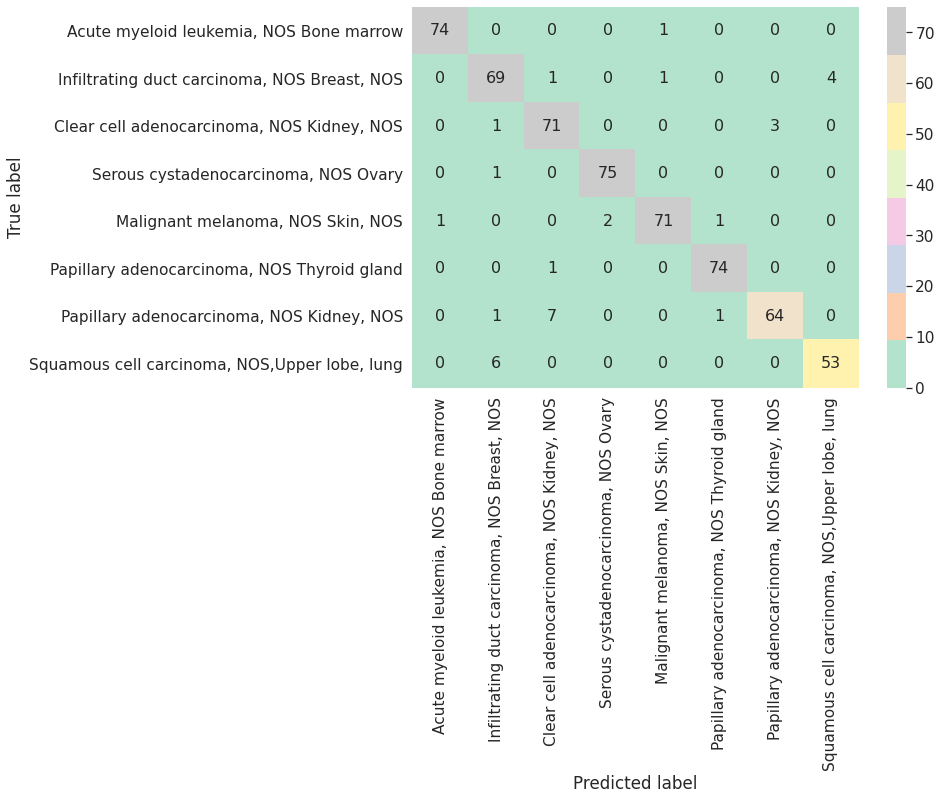

In [25]:
preds = return_preds(model_ann_batch_64, X_test)
show_confusion_matrix(y_test, preds)

## Saving models

In [26]:
model_ann_batch_16.save(saved_dir_ANN_16)
model_ann_batch_32.save(saved_dir_ANN_32)
model_ann_batch_64.save(saved_dir_ANN_64)

INFO:tensorflow:Assets written to: saved_model/ANN/batch_16/assets
INFO:tensorflow:Assets written to: saved_model/ANN/batch_32/assets
INFO:tensorflow:Assets written to: saved_model/ANN/batch_64/assets


## CResNet
 - [X] ResBlock
 - [X] ResNet


In [31]:
class ResBlock(tf.keras.Model):
  def __init__(self, units):
    super(ResBlock, self).__init__()
    self.dense1 = tf.keras.layers.Dense(units,activation='relu')
    self.bn1 = tf.keras.layers.BatchNormalization()

    self.dense2 = tf.keras.layers.Dense(units,activation='relu')
    self.bn2 = tf.keras.layers.BatchNormalization()

    self.act = tf.keras.layers.Activation('relu')
    self.add = tf.keras.layers.Add()
    

  def call(self,input_tensor, training=False):
    x = self.dense1(input_tensor)
    x = self.bn1(x)
    x = self.dense2(x)
    x = self.bn2(x)
    x = self.add([x, input_tensor])
    x = self.act(x)
    
    return x


  def build_graph(self):
        x = tf.keras.Input(shape=(512,))
        return tf.keras.Model(inputs=[x], outputs=self.call(x))

In [32]:
class ResNet(tf.keras.Model):
  def __init__(self, num_classes):
    super(ResNet, self).__init__(name='ResNet')

    self.dense1 = tf.keras.layers.Dense(1024, activation='relu')
    self.res1 = ResBlock(512)
    self.dense2 = tf.keras.layers.Dense(512, activation='relu')
    self.res2 = ResBlock(512)
    self.dense3 = tf.keras.layers.Dense(256, activation='relu')
    self.dense4 = tf.keras.layers.Dense(num_classes, activation='softmax')
  
  def call(self, inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.res1(x)
    x = self.res2(x)
    x = self.dense3(x)
    x = self.dense4(x)
  
    return x
  
  def build_graph(self):
        x = tf.keras.Input(shape=(X_train[1].shape))
        return tf.keras.Model(inputs=[x], outputs=self.call(x))



### CResNet model initialization


In [33]:
cresnet_16 = ResNet(8)
cresnet_32 = ResNet(8)
cresnet_64 = ResNet(8)

### Plotting CResNet 


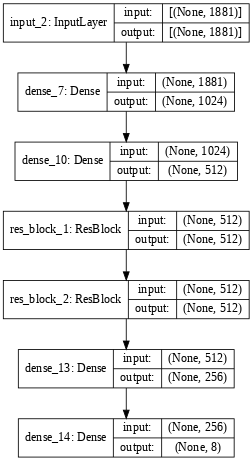

In [34]:
tf.keras.utils.plot_model(
    cresnet_16.build_graph(),                      # here is the trick (for now)
    to_file='cresnet.png', dpi=60,              # saving  
    show_shapes=True, show_layer_names=True,  # show shapes and layer name
    expand_nested=True                       # will show nested block
)

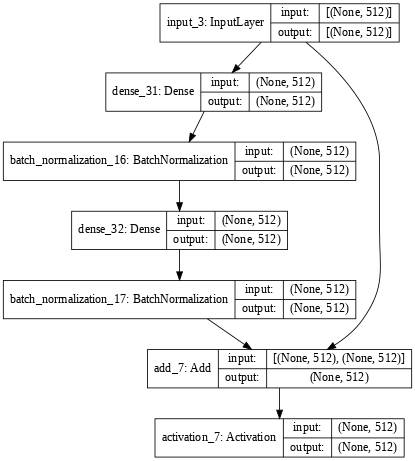

In [35]:
resblock = ResBlock(512)
tf.keras.utils.plot_model(
    resblock.build_graph(),                      # here is the trick (for now)
    to_file='resblock.png', dpi=60,              # saving  
    show_shapes=True, show_layer_names=True,  # show shapes and layer name
    expand_nested=True                       # will show nested block
)

### CResNet model compilation 


In [36]:
cresnet_16.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
cresnet_32.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
cresnet_64.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

saved_dir_CResNet_16 = 'saved_model/CResNet/batch_16/'
saved_dir_CResNet_32 = 'saved_model/CResNet/batch_32/'
saved_dir_CResNet_64 = 'saved_model/CResNet/batch_64/'

log_dir_CResNet_16 = "logs/fit/CResNet/batch_16/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_CResNet_32 = "logs/fit/CResNet/batch_32/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_CResNet_64 = "logs/fit/CResNet/batch_64/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_CResNet = "logs/fit/CResNet" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback_CResNet_16 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_CResNet_16, histogram_freq=1)
tensorboard_callback_CResNet_32 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_CResNet_32, histogram_freq=1)
tensorboard_callback_CResNet_64 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_CResNet_64, histogram_freq=1)

### CResNet Model training

In [37]:
with tf.device('/device:GPU:0'):
  cresnet_16.fit(X_train, y_train, validation_split=0.1, epochs=200,verbose=1, callbacks=[tensorboard_callback_CResNet_16, adaptive_lr],batch_size=16)
  cresnet_32.fit(X_train, y_train, validation_split=0.1, epochs=200,verbose=1, callbacks=[tensorboard_callback_CResNet_32, adaptive_lr],batch_size=32)
  cresnet_64.fit(X_train, y_train, validation_split=0.1, epochs=200,verbose=1, callbacks=[tensorboard_callback_CResNet_64, adaptive_lr],batch_size=64)

Epoch 1/200
99/99 [==============================] - 3s 14ms/step - loss: 0.9423 - accuracy: 0.7053 - val_loss: 0.9104 - val_accuracy: 0.6629
Epoch 2/200
99/99 [==============================] - 1s 6ms/step - loss: 0.3326 - accuracy: 0.8982 - val_loss: 0.4115 - val_accuracy: 0.8629
Epoch 3/200
99/99 [==============================] - 1s 7ms/step - loss: 0.1812 - accuracy: 0.9346 - val_loss: 0.2062 - val_accuracy: 0.9371
Epoch 4/200
99/99 [==============================] - 1s 6ms/step - loss: 0.1233 - accuracy: 0.9584 - val_loss: 0.2121 - val_accuracy: 0.9257
Epoch 5/200
99/99 [==============================] - 1s 6ms/step - loss: 0.1130 - accuracy: 0.9638 - val_loss: 0.1911 - val_accuracy: 0.9371
Epoch 6/200
99/99 [==============================] - 1s 6ms/step - loss: 0.0953 - accuracy: 0.9717 - val_loss: 0.1889 - val_accuracy: 0.9314
Epoch 7/200
99/99 [==============================] - 1s 6ms/step - loss: 0.1007 - accuracy: 0.9651 - val_loss: 0.1852 - val_accuracy: 0.9314
Epoch 8/200


### CResNet model testing

In [38]:

# Batch = 16
loss_cresent, acc_cresenet =cresnet_16.evaluate(X_test, y_test)
print(f'For cresnet batch 16 Loss: {loss_cresent:.4f}, Accuracy: {acc_cresenet:.4f}')

# Batch = 32
loss_cresent, acc_cresenet =cresnet_32.evaluate(X_test, y_test)
print(f'For cresnet batch 32 Loss: {loss_cresent:.4f}, Accuracy: {acc_cresenet:.4f}')


# Batch = 64
loss_cresent, acc_cresenet =cresnet_64.evaluate(X_test, y_test)
print(f'For cresnet batch 64 Loss: {loss_cresent:.4f}, Accuracy: {acc_cresenet:.4f}')

19/19 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9451
For cresnet batch 16 Loss: 0.1884, Accuracy: 0.9451
19/19 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9434
For cresnet batch 32 Loss: 0.2028, Accuracy: 0.9434
19/19 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9400
For cresnet batch 64 Loss: 0.2131, Accuracy: 0.9400


### Confusion matrix CResNet

[[ 74.         507.           1.           1.           0.98469816]
 [ 65.         500.           8.          10.           0.86080346]
 [ 71.         502.           6.           4.           0.92445637]
 [ 75.         507.           0.           1.           0.99242103]
 [ 72.         505.           3.           3.           0.95409449]
 [ 74.         506.           2.           1.           0.97720521]
 [ 65.         506.           4.           8.           0.90424997]
 [ 55.         516.           8.           4.           0.89075615]]
Average MCC value:0.9360856056726039


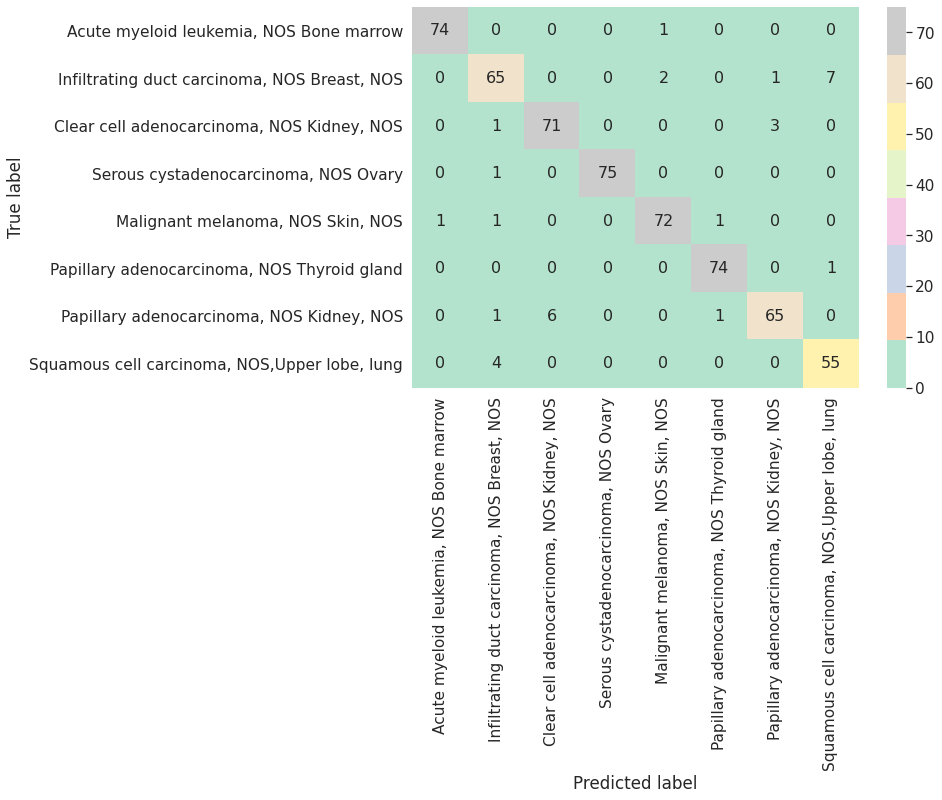

In [39]:
preds = return_preds(cresnet_16, X_test)
show_confusion_matrix(y_test, preds)

[[ 74.         506.           2.           1.           0.97720521]
 [ 68.         500.           8.           7.           0.88591031]
 [ 72.         498.          10.           3.           0.90554502]
 [ 75.         506.           1.           1.           0.98486972]
 [ 71.         507.           1.           4.           0.96134409]
 [ 74.         505.           3.           1.           0.96985124]
 [ 60.         506.           4.          13.           0.86186073]
 [ 56.         520.           4.           3.           0.93453215]]
Average MCC value:0.9351398081414741


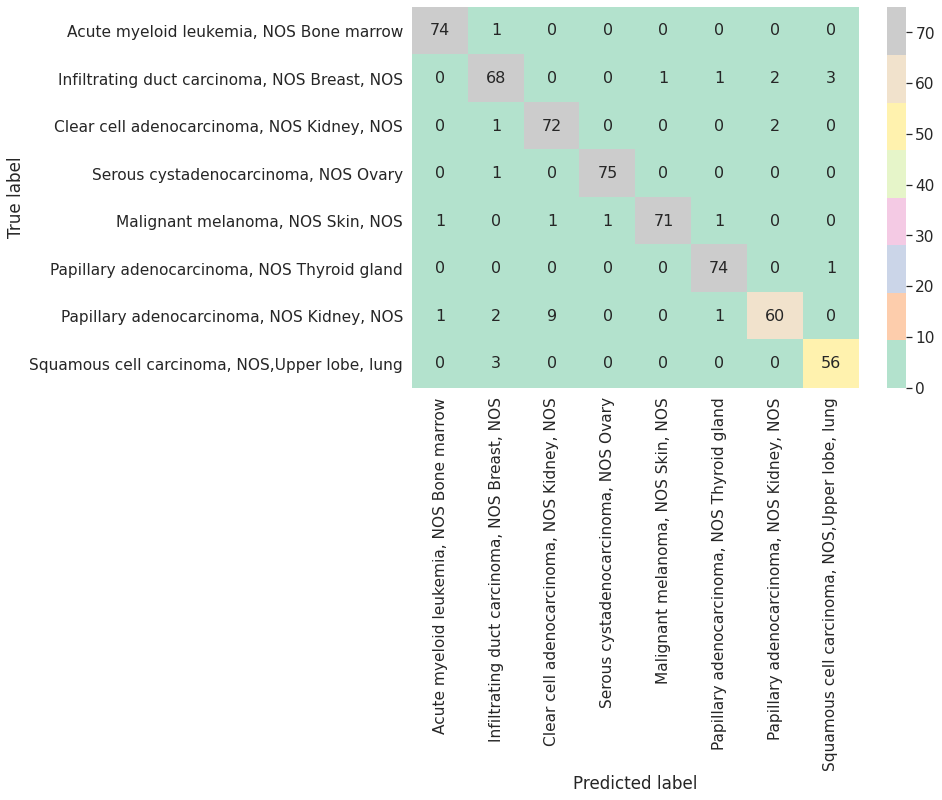

In [40]:
preds = return_preds(cresnet_32, X_test)
show_confusion_matrix(y_test, preds)

[[ 74.         507.           1.           1.           0.98469816]
 [ 65.         498.          10.          10.           0.84698163]
 [ 71.         499.           9.           4.           0.90391148]
 [ 75.         507.           0.           1.           0.99242103]
 [ 72.         506.           2.           3.           0.96155525]
 [ 75.         502.           6.           0.           0.95655099]
 [ 62.         506.           4.          11.           0.8789596 ]
 [ 54.         521.           3.           5.           0.92358724]]
Average MCC value:0.9310831719444458


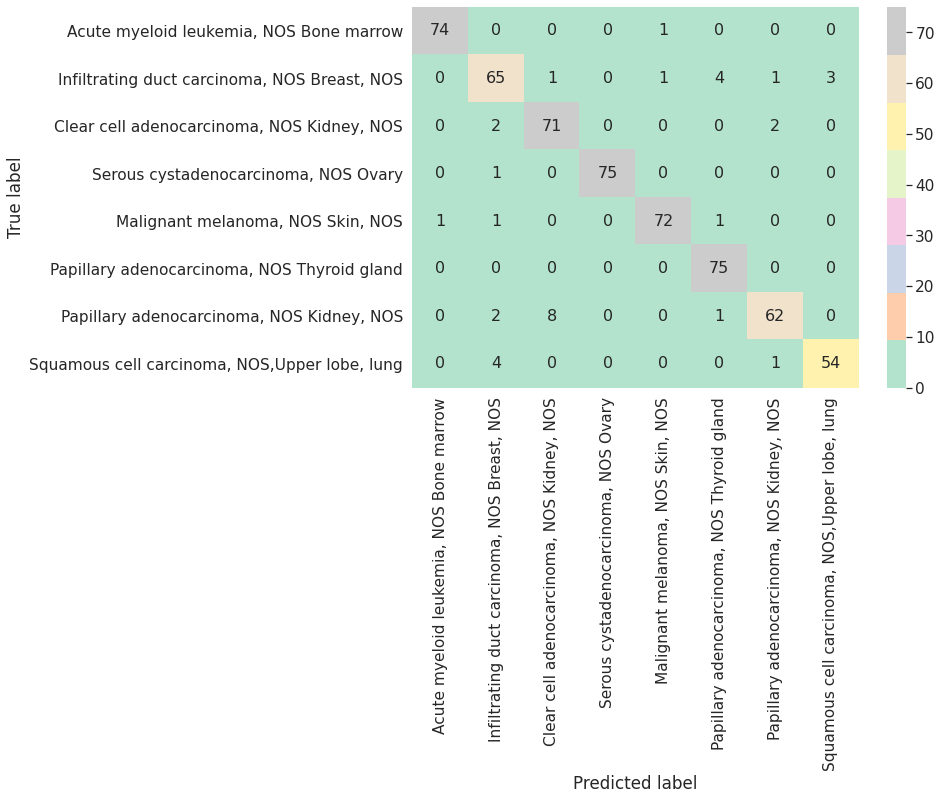

In [41]:
preds = return_preds(cresnet_64, X_test)
show_confusion_matrix(y_test, preds)

In [42]:
cresnet_16.save(saved_dir_CResNet_16)
cresnet_32.save(saved_dir_CResNet_32)
cresnet_64.save(saved_dir_CResNet_64)

INFO:tensorflow:Assets written to: saved_model/CResNet/batch_16/assets
INFO:tensorflow:Assets written to: saved_model/CResNet/batch_32/assets
INFO:tensorflow:Assets written to: saved_model/CResNet/batch_64/assets


## Sub models
Models trained for ensemble training


### ANN Model 2

In [43]:
model_ann_1 = tf.keras.Model(inputs=input, outputs=output,name = 'Artificial_Neural_Network_1')

In [44]:
model_ann_1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
saved_dir_1 = 'saved_model/ANN_1'
log_dir = "logs/fit/ANN_1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [45]:
with tf.device('/device:GPU:0'):
  history_ann = model_ann_1.fit(X_train, y_train, validation_split=0.1, epochs=200,verbose=1, callbacks=[tensorboard_callback,adaptive_lr])

Epoch 1/200
50/50 [==============================] - 2s 20ms/step - loss: 0.1108 - accuracy: 0.9611 - val_loss: 0.3555 - val_accuracy: 0.9086
Epoch 2/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0788 - accuracy: 0.9738 - val_loss: 0.1724 - val_accuracy: 0.9543
Epoch 3/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0533 - accuracy: 0.9816 - val_loss: 0.1578 - val_accuracy: 0.9429
Epoch 4/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0300 - accuracy: 0.9882 - val_loss: 0.1660 - val_accuracy: 0.9429
Epoch 5/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.9921 - val_loss: 0.1592 - val_accuracy: 0.9486
Epoch 6/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.9926 - val_loss: 0.1488 - val_accuracy: 0.9486
Epoch 7/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.9902 - val_loss: 0.1445 - val_accuracy: 0.9543
Epoch 8/200


In [46]:
model_ann_1.save('saved_model/ANN_1')

INFO:tensorflow:Assets written to: saved_model/ANN_1/assets


### ANN Model 3

In [47]:
model_ann_2 = tf.keras.Model(inputs=input, outputs=output,name = 'Artificial_Neural_Network_2')

In [48]:
model_ann_2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
saved_dir_2 = 'saved_model/ANN_2'
log_dir = "logs/fit/ANN_2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [49]:
with tf.device('/device:GPU:0'):
  history_ann_2 = model_ann_2.fit(X_train, y_train, validation_split=0.1, epochs=200,verbose=1, callbacks=[tensorboard_callback,adaptive_lr])

Epoch 1/200
50/50 [==============================] - 2s 17ms/step - loss: 0.1080 - accuracy: 0.9615 - val_loss: 0.2293 - val_accuracy: 0.9371
Epoch 2/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.9799 - val_loss: 0.1335 - val_accuracy: 0.9486
Epoch 3/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.9869 - val_loss: 0.1426 - val_accuracy: 0.9600
Epoch 4/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.9906 - val_loss: 0.1183 - val_accuracy: 0.9600
Epoch 5/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.1056 - val_accuracy: 0.9657
Epoch 6/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 0.9967 - val_loss: 0.1072 - val_accuracy: 0.9657
Epoch 7/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.9889 - val_loss: 0.1098 - val_accuracy: 0.9657
Epoch 8/200


In [50]:
model_ann_2.save('saved_model/ANN_2')

INFO:tensorflow:Assets written to: saved_model/ANN_2/assets


### CResNet Model 2

In [51]:
cresnet_1 = ResNet(8)

In [52]:
cresnet_1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
cresnet_log_dir = "logs/fit/CResNet_1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cresnet_saved_dir = "saved_model/CResNet_1"
tensorboard_callback_cresnet = tf.keras.callbacks.TensorBoard(log_dir=cresnet_log_dir, histogram_freq=1)

In [53]:
with tf.device('/device:GPU:0'):
  cresnet_1.fit(X_train, y_train, validation_split=0.1, epochs=200,verbose=1, callbacks=[tensorboard_callback_cresnet, adaptive_lr])

Epoch 1/200
50/50 [==============================] - 2s 21ms/step - loss: 0.9242 - accuracy: 0.7226 - val_loss: 1.4836 - val_accuracy: 0.5600
Epoch 2/200
50/50 [==============================] - 0s 7ms/step - loss: 0.2235 - accuracy: 0.9359 - val_loss: 0.3410 - val_accuracy: 0.9086
Epoch 3/200
50/50 [==============================] - 0s 7ms/step - loss: 0.1748 - accuracy: 0.9402 - val_loss: 0.2223 - val_accuracy: 0.9257
Epoch 4/200
50/50 [==============================] - 0s 7ms/step - loss: 0.1106 - accuracy: 0.9628 - val_loss: 0.1756 - val_accuracy: 0.9371
Epoch 5/200
50/50 [==============================] - 0s 7ms/step - loss: 0.1047 - accuracy: 0.9640 - val_loss: 0.1732 - val_accuracy: 0.9257
Epoch 6/200
50/50 [==============================] - 0s 7ms/step - loss: 0.0789 - accuracy: 0.9667 - val_loss: 0.1544 - val_accuracy: 0.9314
Epoch 7/200
50/50 [==============================] - 0s 7ms/step - loss: 0.0913 - accuracy: 0.9666 - val_loss: 0.1536 - val_accuracy: 0.9371
Epoch 8/200


In [54]:
loss_ann, acc_ann =cresnet_1.evaluate(X_test, y_test)
print(f'Loss: {loss_ann:.4f}, Accuracy: {acc_ann:.4f}')

19/19 [==============================] - 0s 3ms/step - loss: 0.1954 - accuracy: 0.9434
Loss: 0.1954, Accuracy: 0.9434


[[ 74.         507.           1.           1.           0.98469816]
 [ 68.         499.           9.           7.           0.87906151]
 [ 70.         497.          11.           5.           0.88249133]
 [ 75.         507.           0.           1.           0.99242103]
 [ 71.         507.           1.           4.           0.96134409]
 [ 74.         506.           2.           1.           0.97720521]
 [ 63.         506.           4.          10.           0.88743593]
 [ 55.         519.           5.           4.           0.91581454]]
Average MCC value:0.9350589758054564


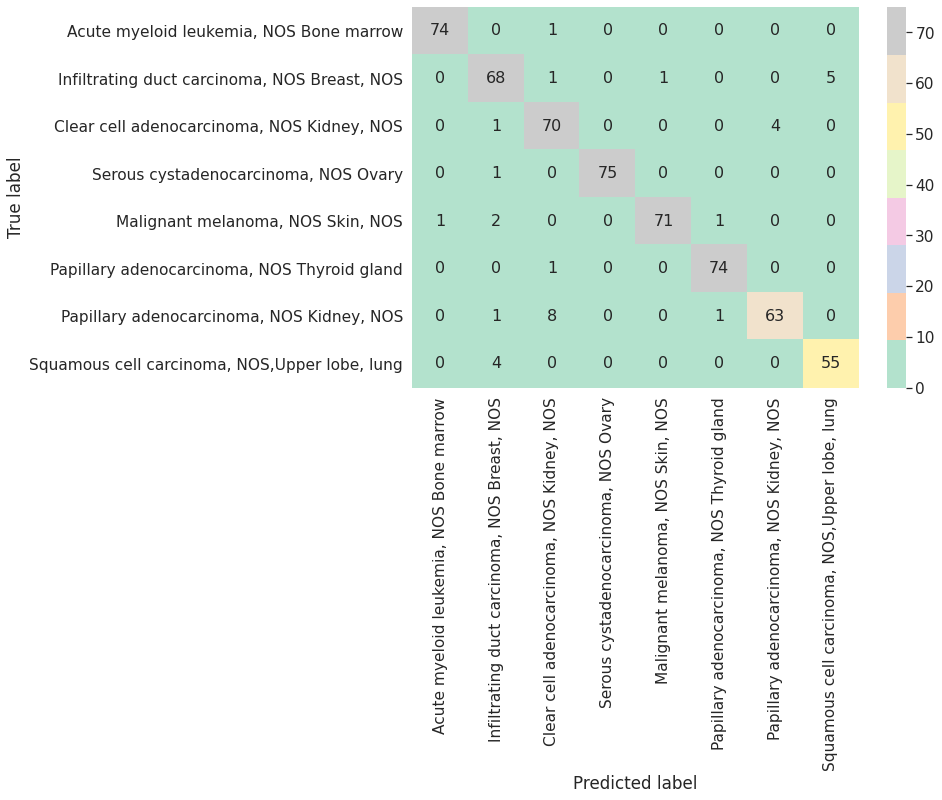

In [55]:
preds = return_preds(cresnet_1, X_test)
show_confusion_matrix(y_test, preds)

In [56]:
cresnet_1.save('saved_model/CResNet_1')

INFO:tensorflow:Assets written to: saved_model/CResNet_1/assets


## LSTM

In [57]:
pseudo_X_train = np.expand_dims(X_train,axis=-1)
pseudo_X_test = np.expand_dims(X_test,axis=-1)


In [58]:
!rm -rf logs/fit/LSTM/*


In [59]:
model_lstm_16 = tf.keras.Sequential([
     tf.keras.layers.LSTM(512,return_sequences=True),
     tf.keras.layers.LSTM(256,return_sequences=True),
     tf.keras.layers.LSTM(128),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(8, activation='softmax')
])
model_lstm_32 = tf.keras.Sequential([
     tf.keras.layers.LSTM(512,return_sequences=True),
     tf.keras.layers.LSTM(256,return_sequences=True),
     tf.keras.layers.LSTM(128),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(8, activation='softmax')
])
model_lstm_64 = tf.keras.Sequential([
     tf.keras.layers.LSTM(512,return_sequences=True),
     tf.keras.layers.LSTM(256,return_sequences=True),
     tf.keras.layers.LSTM(128),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(8, activation='softmax')
])


In [60]:
model_lstm_16.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
log_dir = "logs/fit/LSTM/batch_16/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_lstm_16 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model_lstm_32.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
log_dir = "logs/fit/LSTM/batch_32/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_lstm_32 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model_lstm_64.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
log_dir = "logs/fit/LSTM/batch_64/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_lstm_64 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

saved_dir_LSTM_16 = 'saved_model/LSTM/batch_16/'
saved_dir_LSTM_32 = 'saved_model/LSTM/batch_32/'
saved_dir_LSTM_64 = 'saved_model/LSTM/batch_64/'

In [ ]:
with tf.device('/device:GPU:0'):
  model_lstm_16.fit(pseudo_X_train, y_train, validation_split=0.1, epochs=200,verbose=1,callbacks=[tensorboard_callback_lstm_16, adaptive_lr], batch_size=16)
  model_lstm_32.fit(pseudo_X_train, y_train, validation_split=0.1, epochs=200,verbose=1,callbacks=[tensorboard_callback_lstm_32, adaptive_lr], batch_size=32)
  model_lstm_64.fit(pseudo_X_train, y_train, validation_split=0.1, epochs=200,verbose=1,callbacks=[tensorboard_callback_lstm_64, adaptive_lr], batch_size=64)

Epoch 1/200
99/99 [==============================] - 40s 363ms/step - loss: 1.9672 - accuracy: 0.2230 - val_loss: 1.7358 - val_accuracy: 0.2571
Epoch 2/200
99/99 [==============================] - 34s 346ms/step - loss: 1.6532 - accuracy: 0.3469 - val_loss: 1.6111 - val_accuracy: 0.3771
Epoch 3/200
99/99 [==============================] - 35s 353ms/step - loss: 1.5682 - accuracy: 0.3964 - val_loss: 1.5530 - val_accuracy: 0.3829
Epoch 4/200
99/99 [==============================] - 35s 357ms/step - loss: 1.5273 - accuracy: 0.4047 - val_loss: 1.5293 - val_accuracy: 0.3543
Epoch 5/200
99/99 [==============================] - 36s 359ms/step - loss: 1.5057 - accuracy: 0.4219 - val_loss: 1.5141 - val_accuracy: 0.3486
Epoch 6/200
99/99 [==============================] - 36s 359ms/step - loss: 1.4964 - accuracy: 0.4238 - val_loss: 1.4988 - val_accuracy: 0.4057
Epoch 7/200
99/99 [==============================] - 36s 359ms/step - loss: 1.4930 - accuracy: 0.4187 - val_loss: 1.5013 - val_accuracy:

In [ ]:
loss_ann, acc_ann =model_lstm_16.evaluate(pseudo_X_test, y_test)
print(f'LSTM Batch 16 Loss: {loss_ann:.4f}, Accuracy: {acc_ann:.4f}')

loss_ann, acc_ann =model_lstm_32.evaluate(pseudo_X_test, y_test)
print(f'LSMT Batch 32 Loss: {loss_ann:.4f}, Accuracy: {acc_ann:.4f}')

loss_ann, acc_ann =model_lstm_64.evaluate(pseudo_X_test, y_test)
print(f'LSTM Batch 64 Loss: {loss_ann:.4f}, Accuracy: {acc_ann:.4f}')

In [ ]:
tf.keras.utils.plot_model(model_lstm_16, rankdir = 'TB', show_layer_names=True,dpi=60,show_shapes=True)

### Confusion Matrix LSTM

In [ ]:
preds = return_preds(model_lstm_16, pseudo_X_test)
show_confusion_matrix(y_test, preds)

In [ ]:
preds = return_preds(model_lstm_32, pseudo_X_test)
show_confusion_matrix(y_test, preds)

In [ ]:
preds = return_preds(model_lstm_64, pseudo_X_test)
show_confusion_matrix(y_test, preds)

In [ ]:
model_lstm_16.save(saved_dir_LSTM_16)
model_lstm_32.save(saved_dir_LSTM_32)
model_lstm_64.save(saved_dir_LSTM_64)

In [ ]:
!tensorboard dev upload \
  --logdir logs/fit \
  --name "Cancer Classification using MiRNA genome data" \
  --description "Accuracy and loss metrics of the models trained " \
  --one_shot

In [ ]:
!cp -r saved_model '/content/drive/My Drive/Thesis/'

In [ ]:
!cp -r logs '/content/drive/My Drive/Thesis/'

# Testing different ensembles

In [ ]:
!cp -r /content/drive/MyDrive/Thesis/saved_model ./

In [ ]:
model_ann = tf.keras.models.load_model('saved_model/ANN/batch_32')
model_ann_1 = tf.keras.models.load_model('saved_model/ANN_1')
model_ann_2 = tf.keras.models.load_model('saved_model/ANN_2')
model_cresnet = tf.keras.models.load_model('saved_model/CResNet/batch_32')
model_cresnet_1 = tf.keras.models.load_model('saved_model/CResNet_1')
model_LSTM = tf.keras.models.load_model('saved_model/LSTM/batch_32')

In [ ]:
z = return_preds(model_ann,X_test)
show_confusion_matrix(y_test,z)

In [ ]:
model_ann_3 = tf.keras.Model(inputs=input, outputs=output,name = 'Artificial_Neural_Network_3')

In [ ]:
model_ann_3.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
saved_dir_3 = 'saved_model/ANN_3'
log_dir = "logs/fit/ANN_3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
with tf.device('/device:GPU:0'):
  history_ann_3 = model_ann_3.fit(X_train, y_train, validation_split=0.1, epochs=200,verbose=1, callbacks=[tensorboard_callback, adaptive_lr])

In [ ]:
model_ann_3.save(saved_dir_3)

In [ ]:
cresnet_2 = ResNet(8)

In [ ]:
cresnet_2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
cresnet_log_dir = "logs/fit/CResNet_2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cresnet_saved_dir = "saved_model/CResNet_2"
tensorboard_callback_cresnet = tf.keras.callbacks.TensorBoard(log_dir=cresnet_log_dir, histogram_freq=1)

In [ ]:
with tf.device('/device:GPU:0'):
  cresnet_2.fit(X_train, y_train, validation_split=0.1, epochs=200,verbose=1, callbacks=[tensorboard_callback_cresnet,adaptive_lr
                                                                                         ])

In [ ]:
cresnet_2.save(cresnet_saved_dir)

## 1:1 CResNet and ANN

In [ ]:
def ensemble_predictions(model_list, X_test):
  y_hats = np.array([return_preds(model,X_test) for model in model_list]) 
  y_hats = np.transpose(y_hats)
  preds_mode, preds_stats = stats.mode(y_hats, axis=1)
  preds = np.squeeze(preds_mode)
  return preds
  

In [ ]:
model_list_1 = [model_ann, model_cresnet]
preds = ensemble_predictions(model_list_1, X_test)
show_confusion_matrix(y_test, preds)

## 2:3  CResNet and ANN

In [ ]:
model_list_3 = [model_ann_batch_32, model_ann_1, model_ann_2, cresnet_32, model_cresnet_1]
preds = ensemble_predictions(model_list_3, X_test)
show_confusion_matrix(y_test, preds)

## 3:4 CResNet and ANN

In [ ]:
model_list_2 = [model_ann, model_ann_1, model_ann_2, model_ann_3,cresnet_32, model_cresnet_1,cresnet_2]
preds = ensemble_predictions(model_list_1, X_test)
show_confusion_matrix(y_test, preds)

In [ ]:
!cp -r saved_model '/content/drive/My Drive/Thesis/'
